In [31]:
import cv2
import random
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/car_data'
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')

In [4]:
train.head()

sample_id              video_path  label
0  TRAIN_0000  ./train/TRAIN_0000.mp4      7
1  TRAIN_0001  ./train/TRAIN_0001.mp4      7
2  TRAIN_0002  ./train/TRAIN_0002.mp4      0
3  TRAIN_0003  ./train/TRAIN_0003.mp4      0
4  TRAIN_0004  ./train/TRAIN_0004.mp4      1

In [12]:
len(train)

2698

In [6]:
label = [0,1,2,3,4,5,6,7,8,9,10,11,12]
cnt = []
for i in label:
    cnt.append([i,0])

In [7]:
cnt

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [9, 0],
 [10, 0],
 [11, 0],
 [12, 0]]

In [10]:
for i in range(len(train['label'])):
    idx = label.index(train['label'][i])
    cnt[idx][1] += 1

In [11]:
cnt

[[0, 1784],
 [1, 319],
 [2, 52],
 [3, 79],
 [4, 14],
 [5, 29],
 [6, 4],
 [7, 318],
 [8, 31],
 [9, 35],
 [10, 5],
 [11, 34],
 [12, 7]]

In [13]:
cnt_x = [x[0] for x in cnt]
cnt_y = [x[1] for x in cnt]

In [21]:
fig = px.bar(train, x=cnt_x, y=cnt_y,
             color = np.unique(cnt_x) ,
             color_continuous_scale="Emrld")
fig.update_xaxes(title="labels")
fig.update_yaxes(title = "nums of Videos")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

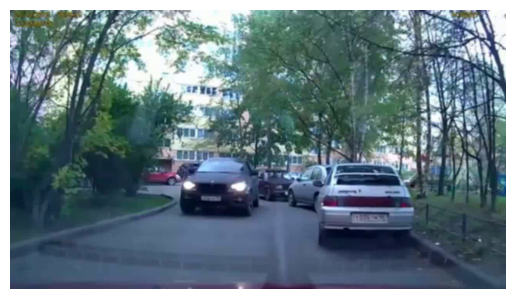

In [35]:
v_path = train['video_path'][0][2:]
video_path = f'{path}/{v_path}'
cap = cv2.VideoCapture(video_path)
#print(video_path)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()
cap.release()


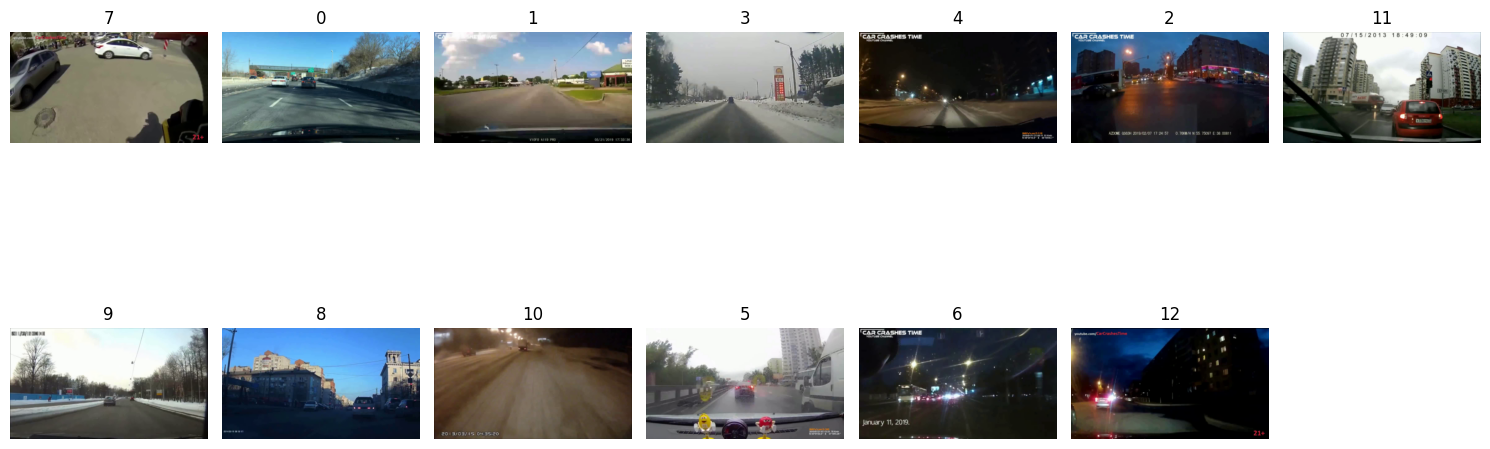

In [34]:
plt.figure(figsize = (15,12))
for idx, i in enumerate(train.label.unique()):
    plt.subplot(4, 7, idx+1)
    df = train[train['label'] == i].reset_index(drop = True)
    video_path = df.loc[random.randint(0, len(df)-1), 'video_path']
    video_path = f'{path}/{video_path[2:]}'
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #img = Image.open(frame_rgb)
    #img = img.resize((224,224))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

In [40]:
def plot_images(df, label):
    plt.figure(figsize = (12,12))
    species_df = df[df['label'] == label].reset_index(drop = True)
    plt.suptitle(label)
    for idx, i in enumerate(np.random.choice(species_df['video_path'], 32)):
        plt.subplot(8,8,idx+1)
        v_path = i[2:]
        video_path = f'{path}/{v_path}'
        cap = cv2.VideoCapture(video_path)
        ret, frame = cap.read()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_rgb)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

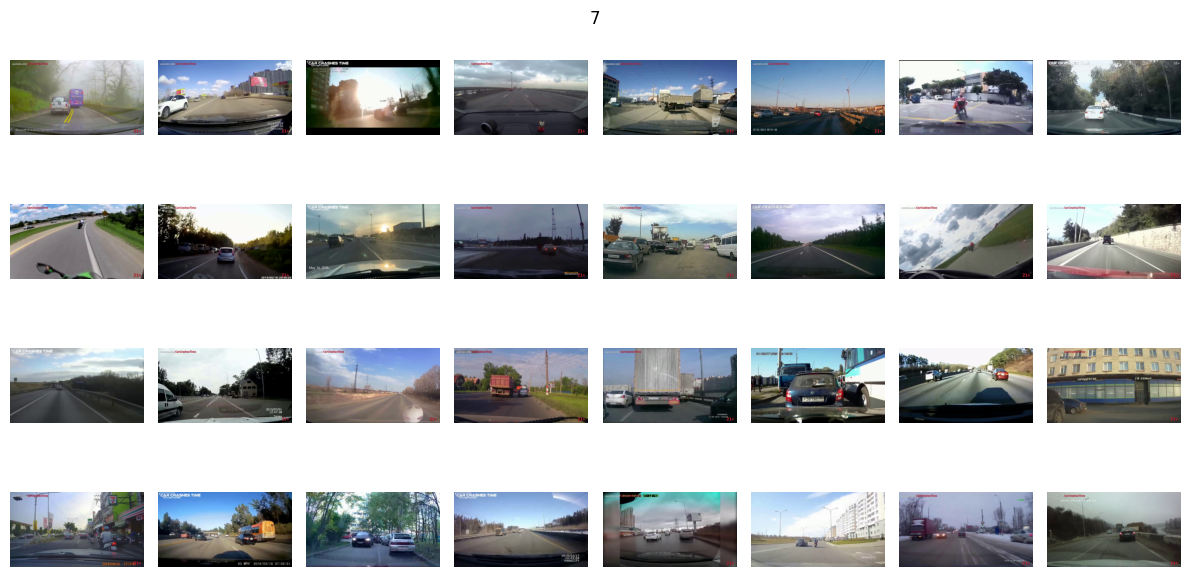

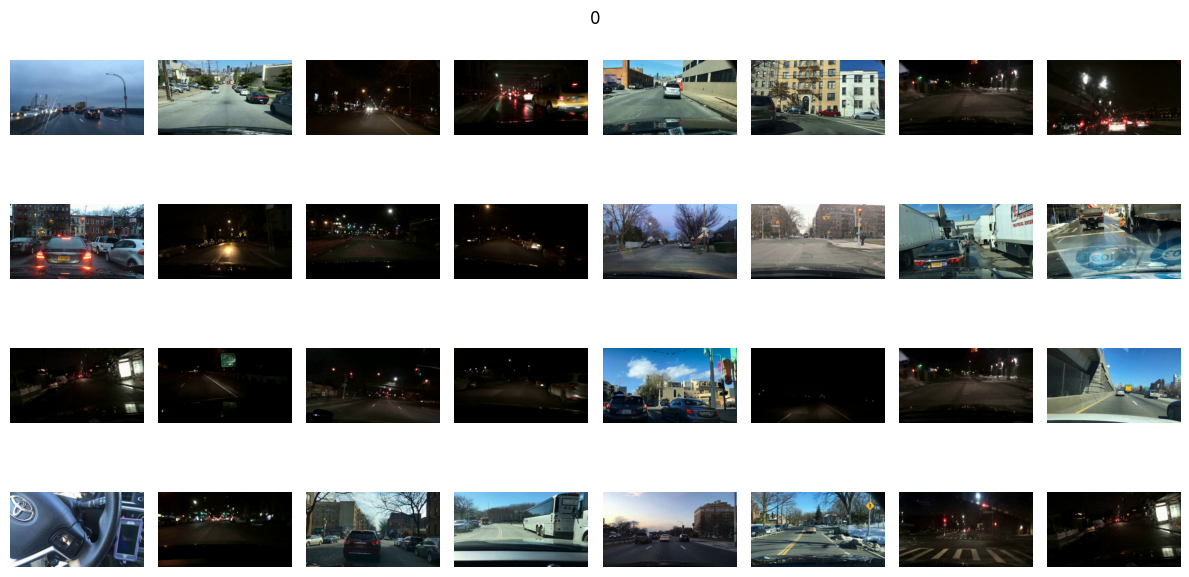

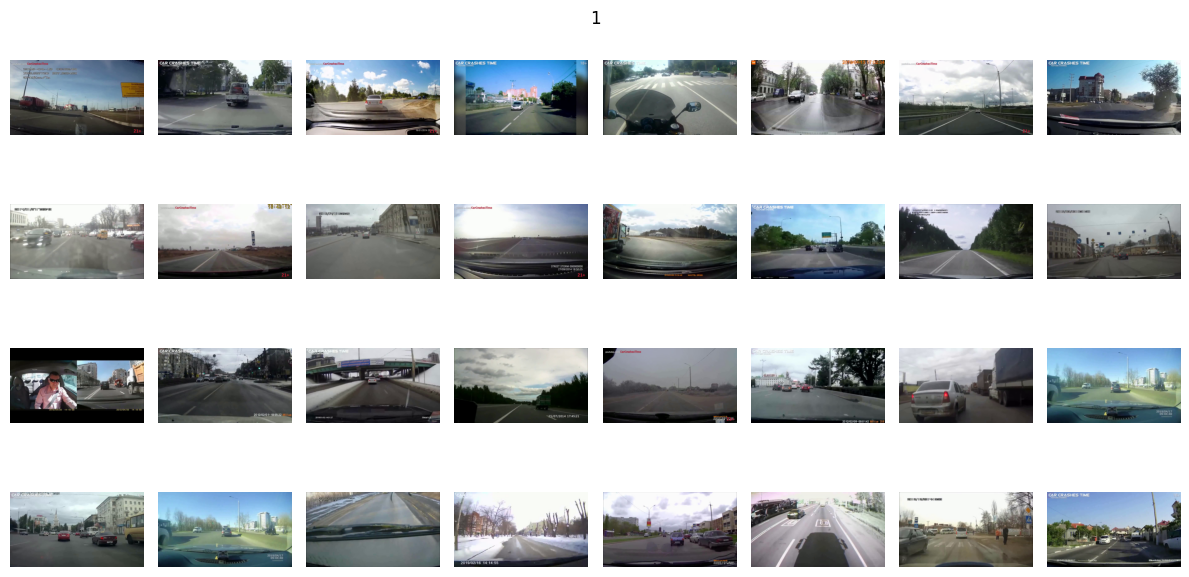

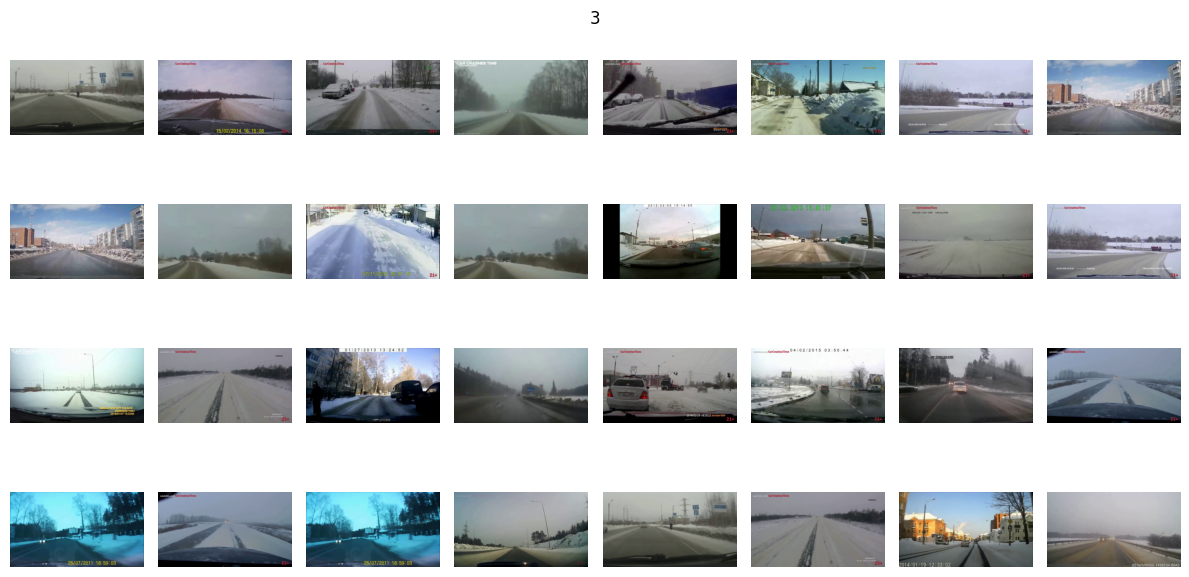

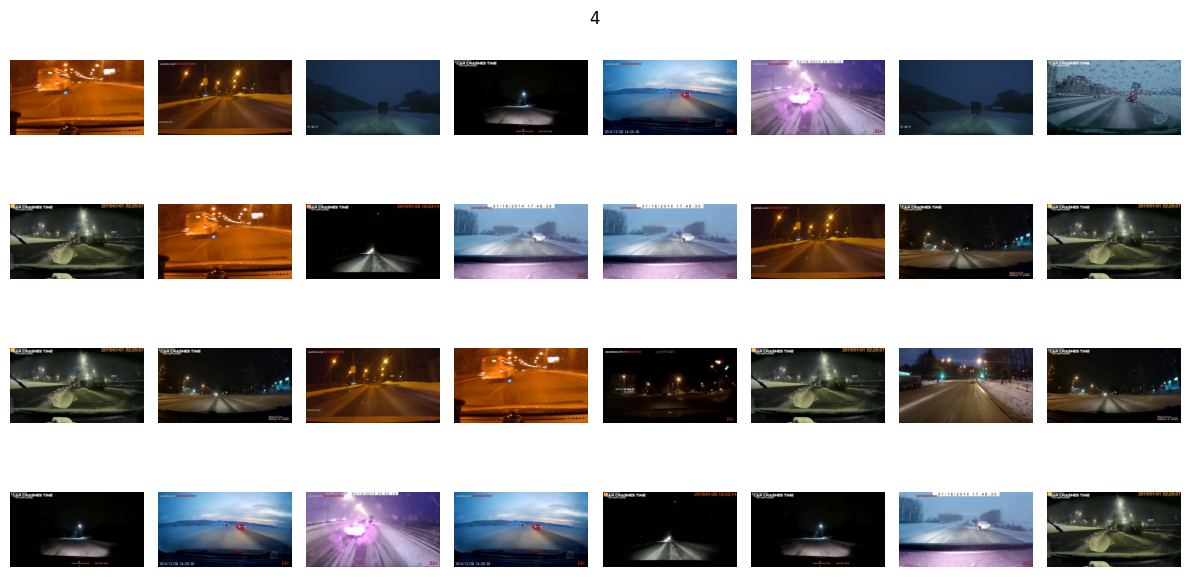

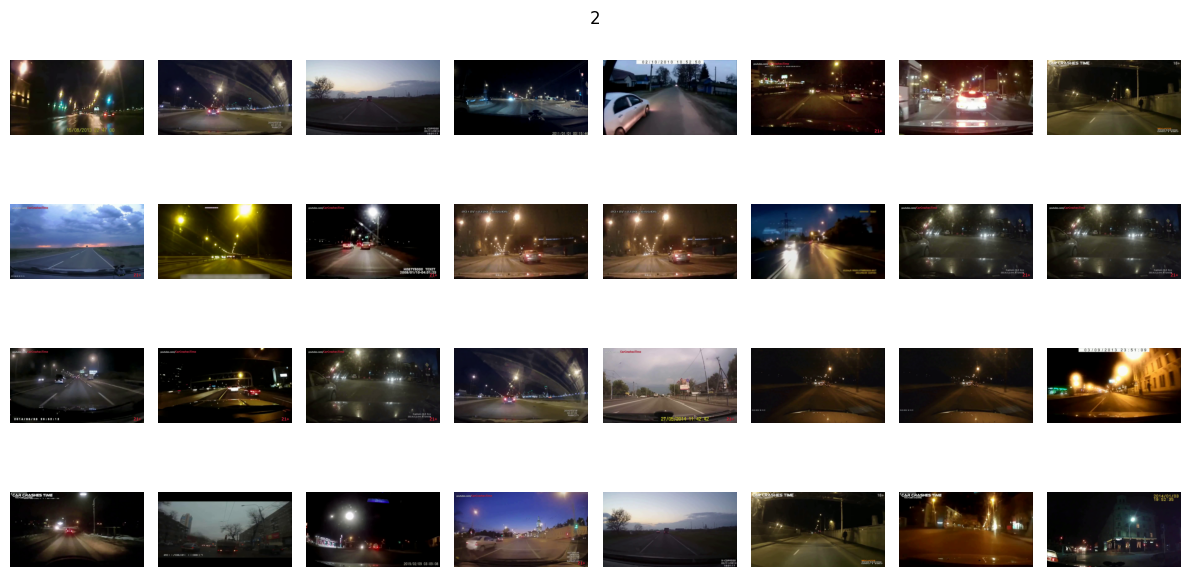

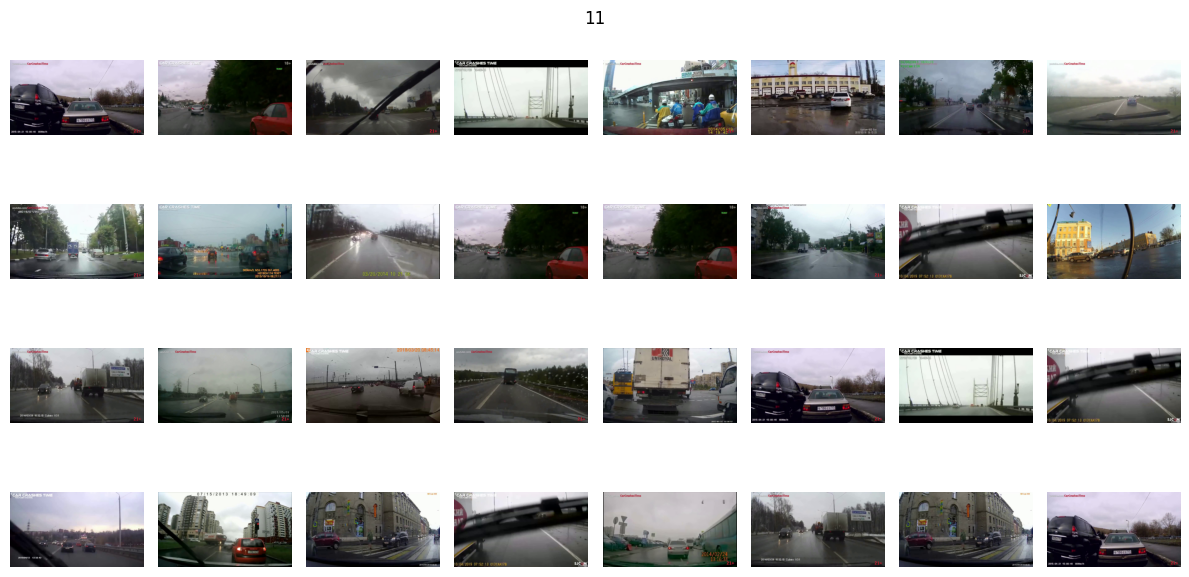

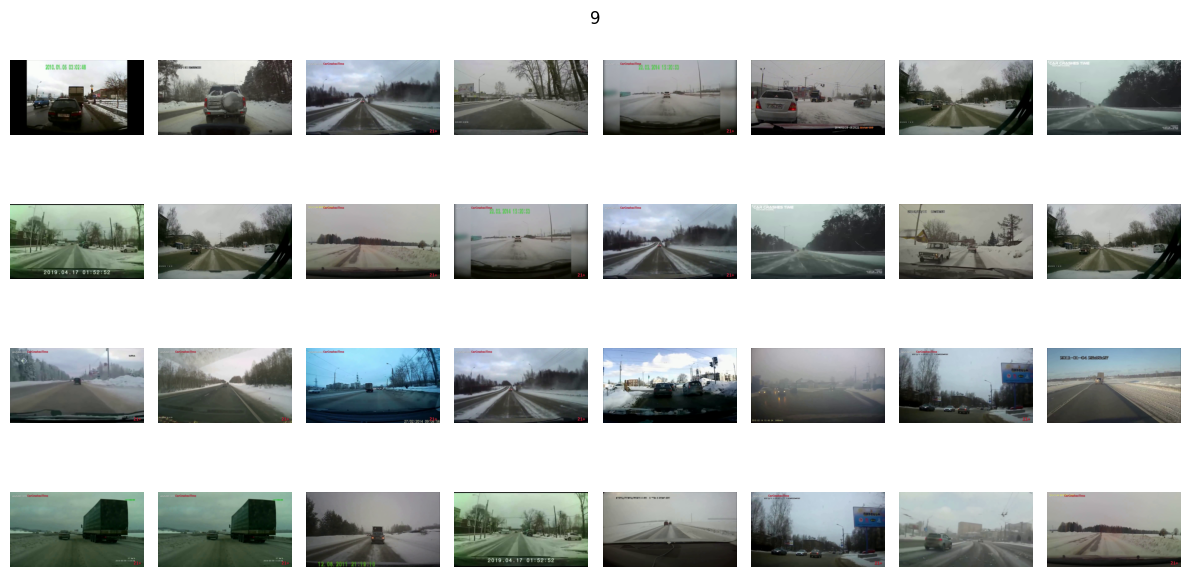

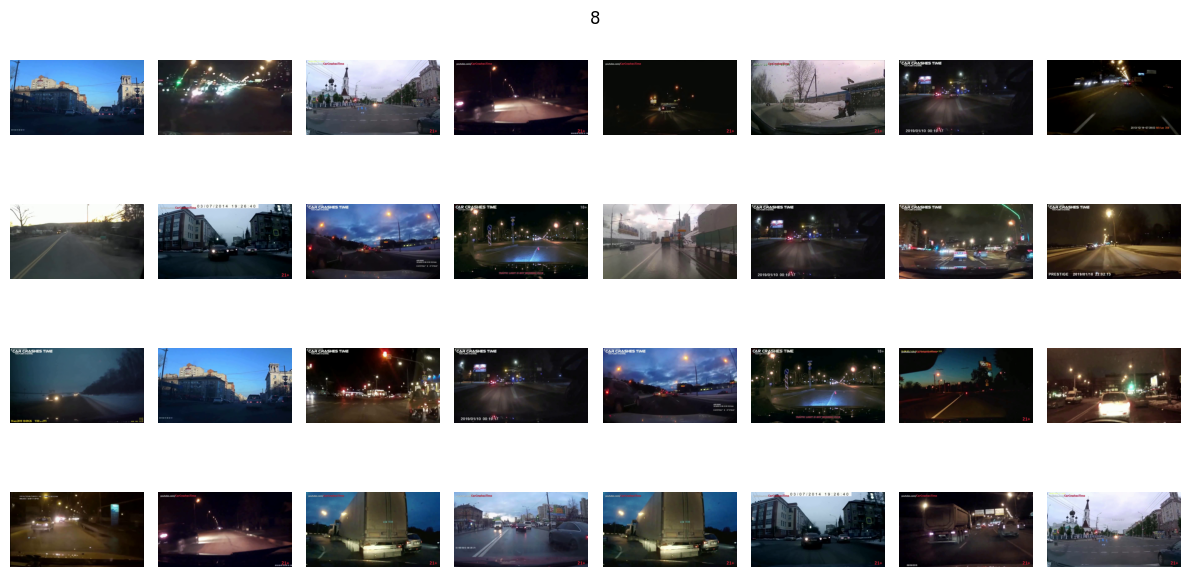

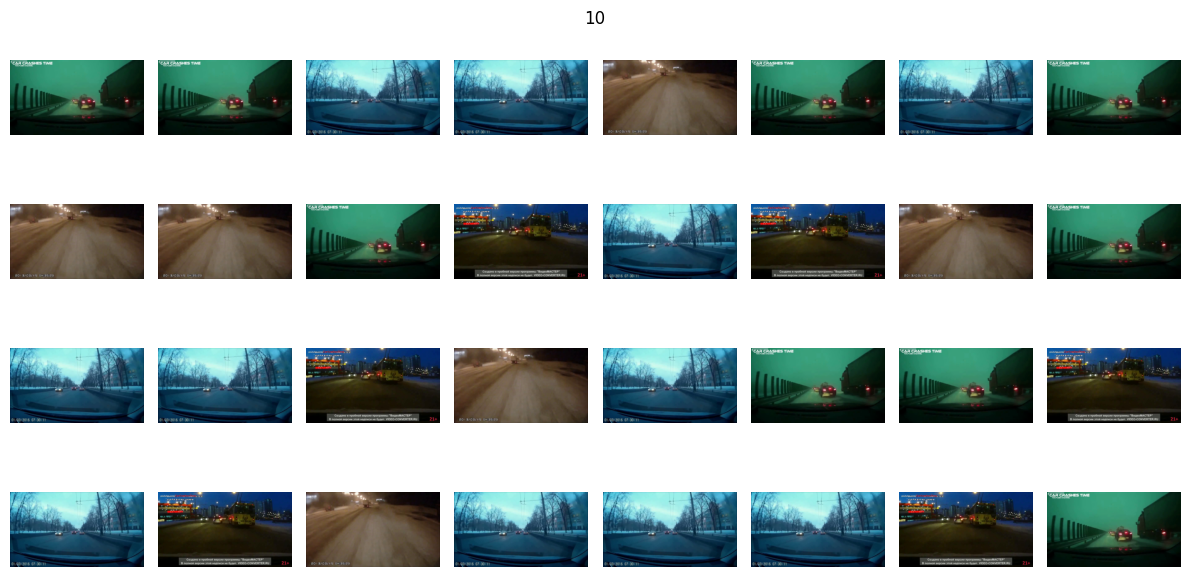

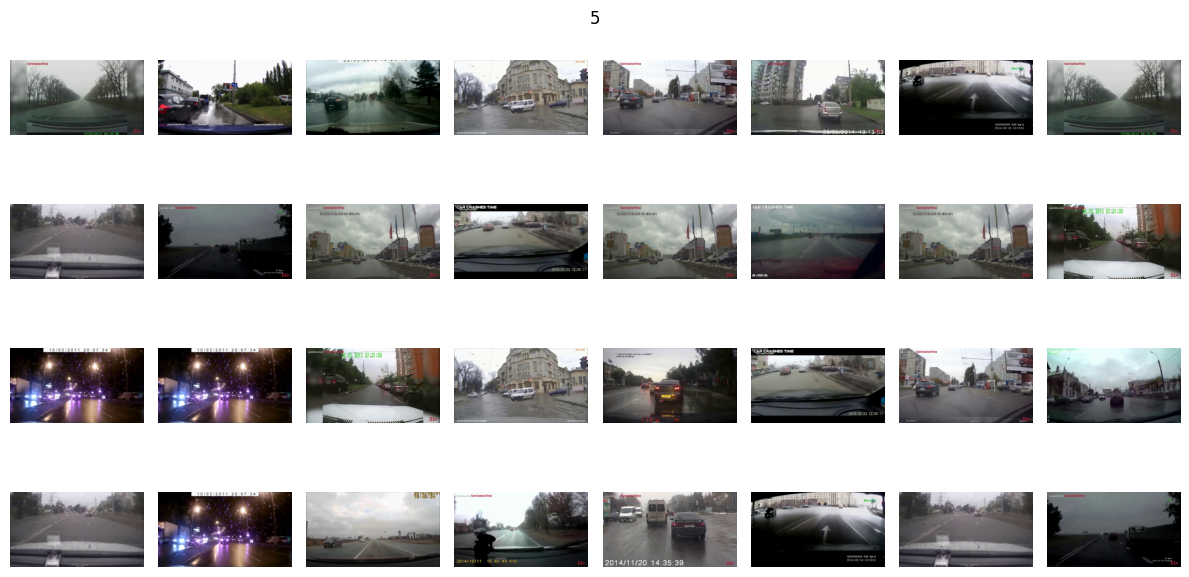

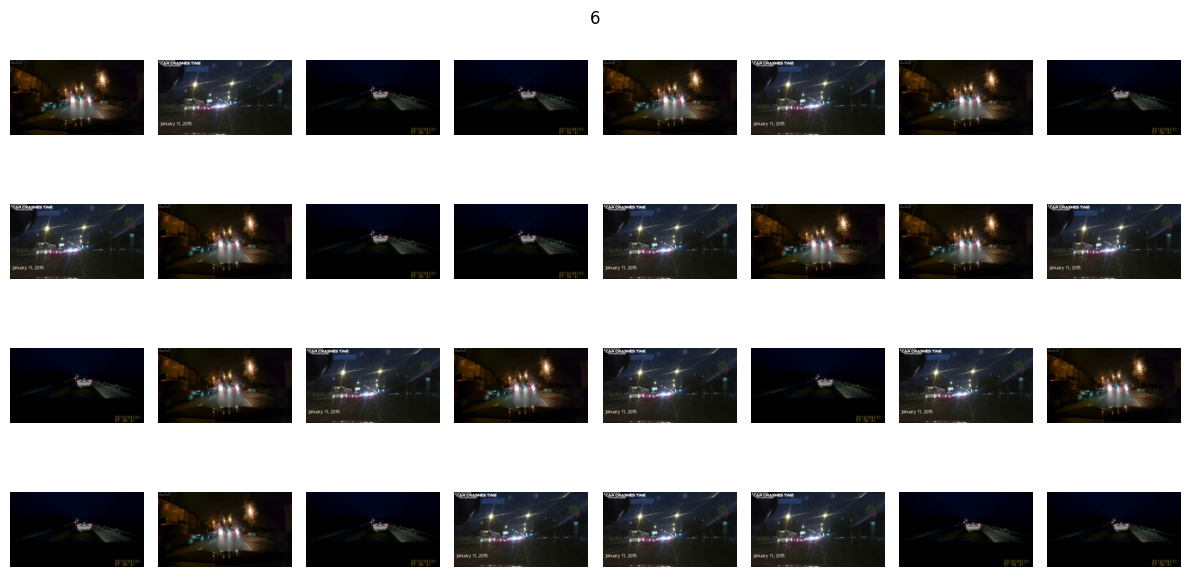

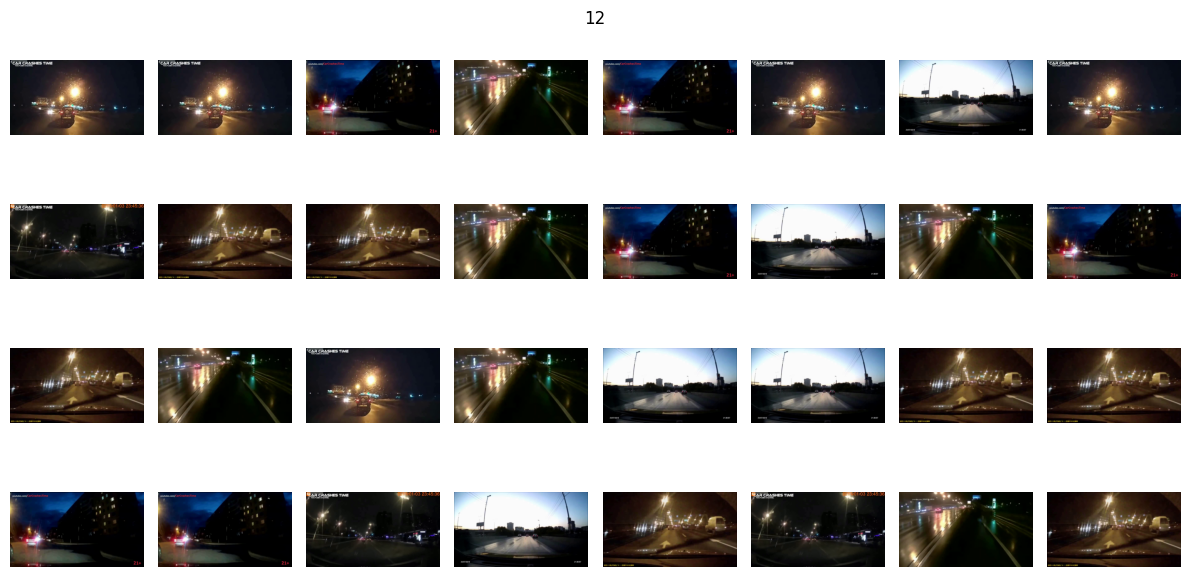

In [41]:
for la in train['label'].unique():
    plot_images(train , label=la)